# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. <b>Обратите внимание:</b> для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

<b>Review criteria</b>

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

In [507]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Треугольное распределение

Будет рассматриваться треугольное распределение
Плотность треугольного распределения выглядит, как треугольник с вершиной левого угла на графике в x = a, вершиной правого угла в x = b, третьей вершиной в x = c. Значение плотности распределения в x = c совпадает с модой распределения и равняется $\frac{2}{b - a}$

In [508]:
a = -2.
b = 3.
c = 2.

Преобразование параметров a, b, c в параметры, принимаемые функциями sts.triang, задающими треугольное распределение

In [509]:
c_share = (c - a) / (b - a)
delta = b - a

Генерация выборки с тысячью значениями по заданому распределению

In [510]:
triang_sample = sts.triang.rvs(c_share, a, delta, size=1000)

Построение плотности заданного треугольного распределения

In [511]:
x = np.arange(a, b, 0.01)
pdf = sts.triang.pdf(x, c_share, a, delta)

Построение плотности распределения и гистограммы выборки с 25 градациями на одном графике

Text(0.5,0,'$x$')

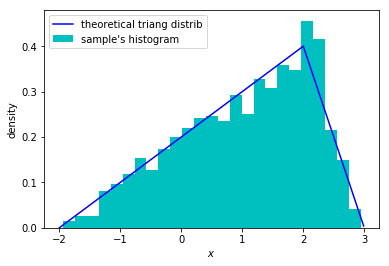

In [512]:
plt.plot(x, pdf, 'b')
plt.hist(triang_sample, bins=25, density=True, color='c')
plt.legend(['theoretical triang distrib', 'sample\'s histogram'])
plt.ylabel('density')
plt.xlabel('$x$')

# Оценка выборочного среднего

Функция генерирует выборку средних значений из generate_number выборок по sample_len значений для треугольного распределения с входными параметрами c_share, a, delta

In [513]:
def sample_mean_distribution(c_share, a, delta, sample_len, generate_number):
    norm_hist = []
    for i in xrange(generate_number):
        current_sample = sts.triang.rvs(c_share, a, delta, size=int(sample_len))
        norm_hist.append(np.average(current_sample))
    return norm_hist

Вычисление теоретических значений математического ожидания и дисперсии заданного треугольного распределения

In [514]:
mean = (a + b + c) / 3.
disp = (a ** 2 + b ** 2 + c ** 2 - a * b - a * c - b * c) / 18.
print 'Мат. ожидание заданного треугольного распределения:   \t', mean
print 'Дисперсия заданного треугольного распределения:   \t', disp

Мат. ожидание заданного треугольного распределения:   	1.0
Дисперсия заданного треугольного распределения:   	1.16666666667


Построение оценки для выборок с sample_len значениями и плотности распределения выборочного среднего, приближаемого нормальным распределением

sample_len = 3

Text(0.5,0,'$x$')

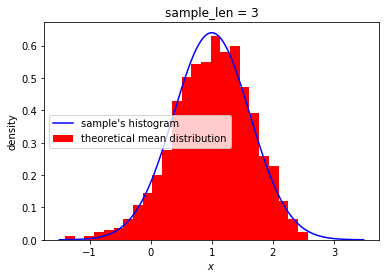

In [515]:
sample_len = 3.
generate_number = 1000
sigma_3 = (disp / sample_len) ** 0.5
norm_rv_3 = sts.norm(mean, sigma_3)
x_norm = np.arange(mean - 4 * sigma_3, mean + 4 * sigma_3, 0.01)
pdf_norm_3 = norm_rv_3.pdf(x_norm)
norm_hist_3 = sample_mean_distribution(c_share, a, delta, sample_len, generate_number)
plt.plot(x_norm, pdf_norm_3, 'b')
plt.hist(norm_hist_3, bins=25, density=True, color='r')
plt.title('sample_len = '+str(int(sample_len)))
plt.legend(['sample\'s histogram', 'theoretical mean distribution'])
plt.ylabel('density')
plt.xlabel('$x$')

sample_len = 5

Text(0.5,0,'$x$')

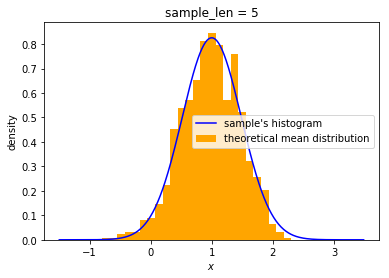

In [516]:
sample_len = 5.
generate_number = 1000
sigma_5 = (disp / sample_len) ** 0.5
norm_rv_5 = sts.norm(mean, sigma_5)
# x_norm = np.arange(mean - 4 * sigma_5, mean + 4 * sigma_5, 0.01)
pdf_norm_5 = norm_rv_5.pdf(x_norm)
norm_hist_5 = sample_mean_distribution(c_share, a, delta, sample_len, generate_number)
plt.plot(x_norm, pdf_norm_5, 'b')
plt.hist(norm_hist_5, bins=25, density=True, color='orange')
plt.title('sample_len = '+str(int(sample_len)))
plt.legend(['sample\'s histogram', 'theoretical mean distribution'])
plt.ylabel('density')
plt.xlabel('$x$')

sample_len = 10

Text(0.5,0,'$x$')

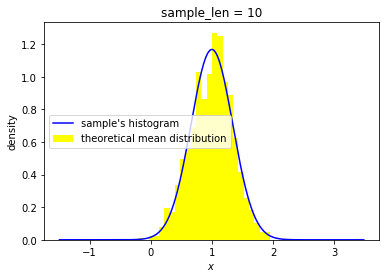

In [517]:
sample_len = 10.
generate_number = 1000
sigma_10 = (disp / sample_len) ** 0.5
norm_rv_10 = sts.norm(mean, sigma_10)
# x_norm = np.arange(mean - 4 * sigma_10, mean + 4 * sigma_10, 0.01)
pdf_norm_10 = norm_rv_10.pdf(x_norm)
norm_hist_10 = sample_mean_distribution(c_share, a, delta, sample_len, generate_number)
plt.plot(x_norm, pdf_norm_10, 'b')
plt.hist(norm_hist_10, bins=25, density=True, color='yellow')
plt.title('sample_len = '+str(int(sample_len)))
plt.legend(['sample\'s histogram', 'theoretical mean distribution'])
plt.ylabel('density')
plt.xlabel('$x$')

sample_len = 30

Text(0.5,0,'$x$')

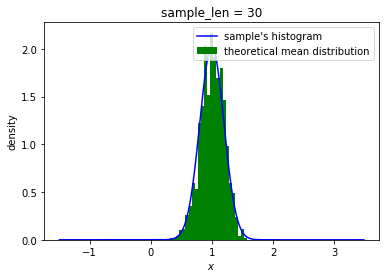

In [518]:
sample_len = 30.
generate_number = 1000
sigma_30 = (disp / sample_len) ** 0.5
norm_rv_30 = sts.norm(mean, sigma_30)
# x_norm = np.arange(mean - 4 * sigma_30, mean + 4 * sigma_30, 0.01)
pdf_norm_30 = norm_rv_30.pdf(x_norm)
norm_hist_30 = sample_mean_distribution(c_share, a, delta, sample_len, generate_number)
plt.plot(x_norm, pdf_norm_30, 'b')
plt.hist(norm_hist_30, bins=25, density=True, color='green')
plt.title('sample_len = '+str(int(sample_len)))
plt.legend(['sample\'s histogram', 'theoretical mean distribution'])
plt.ylabel('density')
plt.xlabel('$x$')

# Вывод

Как видно из гистрограммы ниже и пографикам выше, с увеличением числа значений выборки распределение выборочного среднего сужается, его дисперсия уменьшается, а границы сглаживаются и оценка распределения всё ближе к нормальному распределению

Text(0.5,0,'$x$')

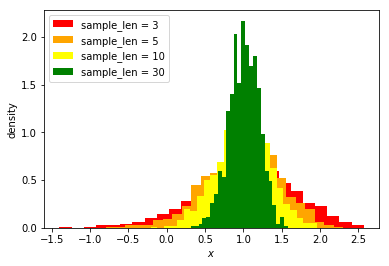

In [519]:
plt.hist(norm_hist_3, bins=25, density=True, color='r')
plt.hist(norm_hist_5, bins=25, density=True, color='orange')
plt.hist(norm_hist_10, bins=25, density=True, color='yellow')
plt.hist(norm_hist_30, bins=25, density=True, color='green')
plt.legend(['sample_len = 3', 'sample_len = 5', 'sample_len = 10', 'sample_len = 30'])
plt.ylabel('density')
plt.xlabel('$x$')